Mount the notebook to GoogleDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import the libraries needed in the workbook

In [2]:
import math
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Terrorism/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

# QUICK RECAP OF THE DATASET

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Geography: Worldwide

Time period: 1970-2017, except 1993

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

# DATA DICTIONARY

Year: year of the act. (numerical)

Month: month number of the act. (numerical)

Day: day number of the act. (numerical)

Country: Country name. (object)

City: The city where the act executed. (categorical)

latitude: Coordinate of the crime scene. (coordination)

longitude:Coordinate of the crime scene. (coordination)

AttackType: The type of the act (Bombing/Explosion, Armed Assault, Facility/Infrastructure Attack, Hostage Taking (Kidnapping), Hijacking, Assassination, Unknown, Hostage Taking (Barricade Incident), Unarmed Assault) (categorical)

Killed: Number of the people that died in the act. (numerical)

Wounded: Number of the people that wounded in the act. (numerical)

Target: The name of the target. (object)

Summary: A short description of the act. (object)

Group: The terrorist group that executed the terrorist act. (categorical)

TargetType: Target type. (Airports & Aircraft, Military, Government (Diplomatic), Business, Police, Government (General), Private Citizens & Property, Educational Institution, Journalists & Media, Violent Political Party, Tourists, Transportation, Utilities, NGO, Unknown, Religious Figures/Institutions, Telecommunication, Food or Water Supply, Maritime, Terrorists/Non-State Militia, Other) (categorical)

weaponType: The type of the weapon used in the act. (Explosives, Incendiary, Firearms, Unknown, Melee, Chemical, Fake Weapons, Sabotage Equipment, Other) (categorical)

Motive: The motivation behind the act. (object)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
df.shape

(181691, 135)

In [12]:
df.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
81490,200609110010,2006,9,11,NaN,0,NaN,186,Sri Lanka,6,South Asia,Eastern,Trincomalee,8.577826,81.218719,1.0,0,A motorcycle in Trincomalee,09/11/2006: Unidentified gunmen fatally shot R...,1,1,1,1.0,2.0,Other Crime Type,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,12,NGO,62.0,International NGO,World Concern NGO,Ragunathan Ramalingam,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""World concern worker killed in Sri Lanka,"" Se...","""Infant among 12 persons killed in separate in...","""Another foreign aid worker shot dead,"" TamilN...",UMD Sri Lanka 2011,-9,-9,0,-9,NaN
125443,201401030096,2014,1,3,NaN,0,NaN,19,Bangladesh,6,South Asia,Rajshahi,Kansat,24.729906,88.170605,1.0,0,NaN,01/03/2014: Assailants threw a petrol bomb at ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,14,Private Citizens & Property,73.0,Vehicles/Transportation,Not Applicable,Truck,...,NaN,NaN,A petrol bomb was used in the attack.,0.0,0.0,0.0,3.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A truck was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Arson attack burns 3 in Chapainawabganj,"" Dha...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
180855,201711280013,2017,11,28,NaN,0,NaN,4,Afghanistan,6,South Asia,Kandahar,Maruf district,31.380893,67.237117,3.0,0,NaN,11/28/2017: A roadside bomb detonated targetin...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,73.0,Vehicles/Transportation,Not Applicable,Vehicle,...,NaN,NaN,A roadside landmine was used in the attack.,7.0,0.0,0.0,3.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers conflict across sources. Foll...,"""Roadside bomb kills eight in Afghanistan - lo...","""Highlights: Pakistan Pashto Press 29 November...",NaN,START Primary Collection,0,0,0,0,NaN
92568,200906300016,2009,6,30,NaN,1,7/2/2009,45,Colombia,3,South America,Antioquia,Taraza,7.579405,-75.400101,1.0,0,"The attack took place in Taraza, Antioquia, Co...","06/30/2009: On Tuesday evening at 1815, in Tar...",1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,6.0,Hostage Taking (Kidnapping),NaN,NaN,14,Private Citizens & Property,82.0,Labor Union Related,NaN,A spokesman for the association of peasants,...,NaN,NaN,Unknown melee weapons were used in the attack.,1.0,0.0,0.0,0.0,0.0,0.0,-9,4.0,Unknown,NaN,It is unknown if the attack caused any propert...,1.0,1.0,0.0,NaN,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,Hostage(s) killed (not during rescue attempt),0.0,The summary of this incident was partially bas...,"National Counterterrorism Center, ""One Politic...","Caracol Radio,""Murders,"" http://www.derechoshu...",NaN,ISVG,-9,-9,0,-9,NaN
144041,201502060062,2015,2,6,NaN,0,NaN,4,Afghanistan,6,South Asia,Nangarhar,Ghani Khel,34.195751,70.786385,1.0,0,NaN,02/06/2015: Assailants attacked a police check...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Afghan Police,Checkpost,...,NaN,NaN,NaN,8.0,0.0,6.0,10.0,0.0,10.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Let's rename the groups for better access

In [13]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
#Only select the meaningful columns
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['Casualities']=df['Killed']+df['Wounded']
df1=df.copy()

In [14]:
df1.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [15]:
# Checking the null velues in data
df1.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [16]:
df_au=df1[df1["Country"] == 'Australia']

In [17]:
df_au.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
565,1970,10,21,Australia,Australasia & Oceania,Melbourne,-37.813187,144.962980,Bombing/Explosion,0.0,0.0,Yugoslav Consulate,NaN,Croatian Nationalists,Government (Diplomatic),Explosives,NaN,0.0
1087,1971,11,23,Australia,Australasia & Oceania,Sydney,-33.873651,151.206890,Bombing/Explosion,0.0,0.0,yugoslav travel agency,NaN,Croatian Nationalists,Business,Explosives,NaN,0.0
1479,1972,9,17,Australia,Australasia & Oceania,Brisbane,-27.470933,153.023502,Bombing/Explosion,0.0,0.0,yugoslav Tourist Office,NaN,Croatian Nationalists,Tourists,Explosives,NaN,0.0
1547,1972,9,25,Australia,Australasia & Oceania,Unknown,NaN,NaN,Assassination,0.0,0.0,Sydney Consulate Diplomat,09/25/1972: A letter bomb addressed to a Sydne...,Black September,Government (Diplomatic),Explosives,NaN,0.0
1548,1972,9,25,Australia,Australasia & Oceania,Unknown,NaN,NaN,Assassination,0.0,0.0,Sydney Consulate Diplomat,09/25/1972: A letter bomb addressed to a Sydne...,Black September,Government (Diplomatic),Explosives,NaN,0.0


In [18]:
df_au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 565 to 181454
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         114 non-null    int64  
 1   Month        114 non-null    int64  
 2   Day          114 non-null    int64  
 3   Country      114 non-null    object 
 4   Region       114 non-null    object 
 5   city         114 non-null    object 
 6   latitude     109 non-null    float64
 7   longitude    109 non-null    float64
 8   AttackType   114 non-null    object 
 9   Killed       111 non-null    float64
 10  Wounded      110 non-null    float64
 11  Target       114 non-null    object 
 12  Summary      58 non-null     object 
 13  Group        114 non-null    object 
 14  Target_type  114 non-null    object 
 15  Weapon_type  114 non-null    object 
 16  Motive       28 non-null     object 
 17  Casualities  110 non-null    float64
dtypes: float64(5), int64(3), object(10)
memory us

In [19]:
#Checking for null values
df_au.isnull().sum()

Year            0
Month           0
Day             0
Country         0
Region          0
city            0
latitude        5
longitude       5
AttackType      0
Killed          3
Wounded         4
Target          0
Summary        56
Group           0
Target_type     0
Weapon_type     0
Motive         86
Casualities     4
dtype: int64

In [20]:
df_au.Group.value_counts()

Unknown                                        79
Jihadi-inspired extremists                      6
Black September                                 5
Informal Anarchist Federation                   3
Croatian Nationalists                           3
Extortionists                                   2
Palestine Liberation Organization (PLO)         1
Anti-Iran Government Exiles                     1
East Timorese extremists                        1
Justice Commandos for the Armenian Genocide     1
Anti-Nuclear extremists                         1
Zapatista National Liberation Army              1
Kurds                                           1
Animal Liberation Front (ALF)                   1
Muslim extremists                               1
Neo-Nazi extremists                             1
Combat 18                                       1
Anarchists                                      1
Greek Bulgarian Armenian Front                  1
Islamic State of Iraq and the Levant (ISIL)     1


In [21]:
df_au["Killed"].value_counts()

0.0    95
1.0    10
2.0     5
3.0     1
Name: Killed, dtype: int64

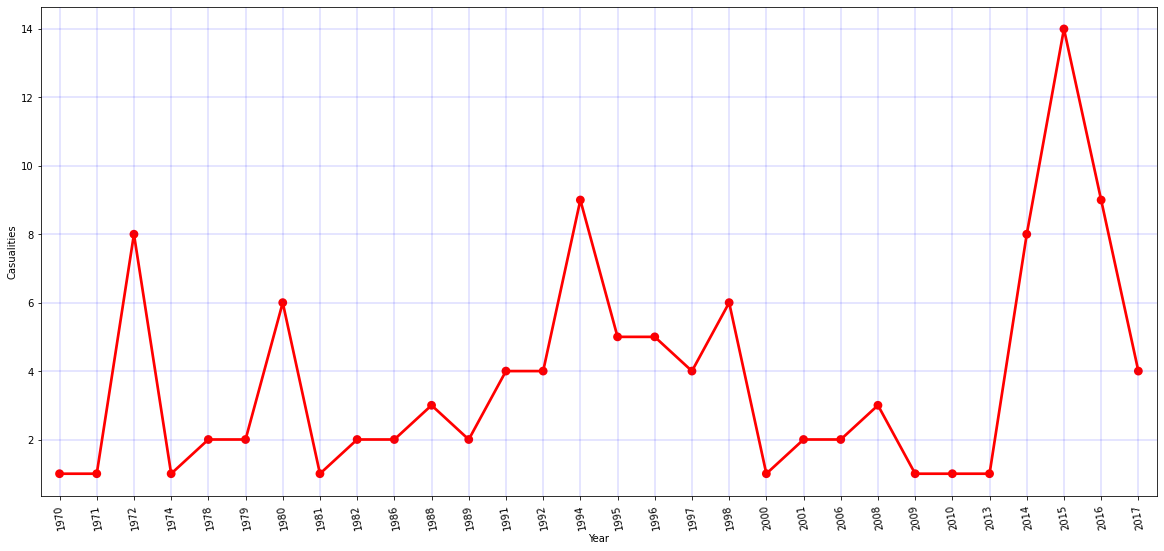

In [22]:
year = df_au["Year"].value_counts()
Year_List = sorted(list(zip(year.index,year.values)))
Year_Attack, Counts_attack = zip(*Year_List)
Year_Attack, Counts_attack = list(Year_Attack), list(Counts_attack)

f,ax = plt.subplots(figsize=(20,9))
sns.pointplot(x=Year_Attack,y=Counts_attack,color="Red")
plt.xlabel("Year")
plt.xticks(rotation=100)
plt.ylabel("Casualities")
plt.grid(color='b', linestyle='-', linewidth=0.2)

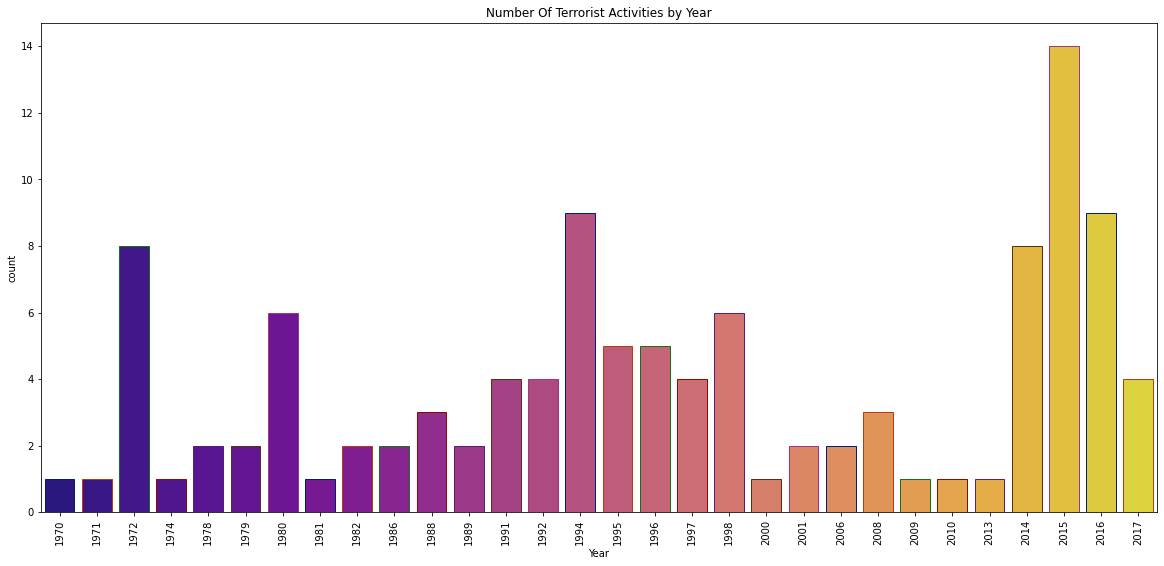

In [35]:
plt.subplots(figsize=(20,9))
sns.countplot('Year',data=df_au,palette='plasma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Year')
plt.show()

Australia is REALLY a peaceful country, the number of causalities is <15 during the whole period.
The number of killed people peaked in 2015 at 14, and then decreased to just 4 in the next year

# **WHERE ARE THE HOTSPOTS OF TERRORISM IN AUSTRALIA?**

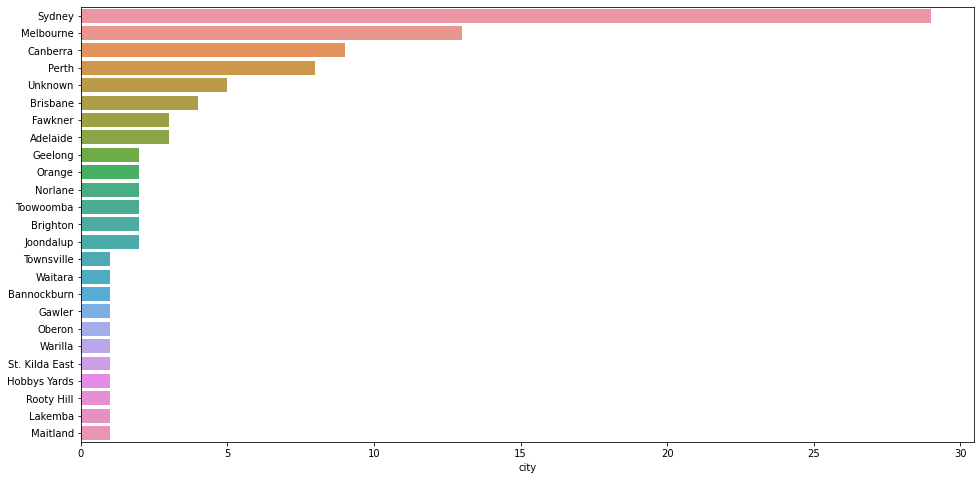

In [23]:
plt.subplots(figsize=(16,8))
sns.barplot(x=df_au.city.value_counts(), y=df_au.city.value_counts().index,
            order = df_au.city.value_counts().iloc[:25].index, orient="h")

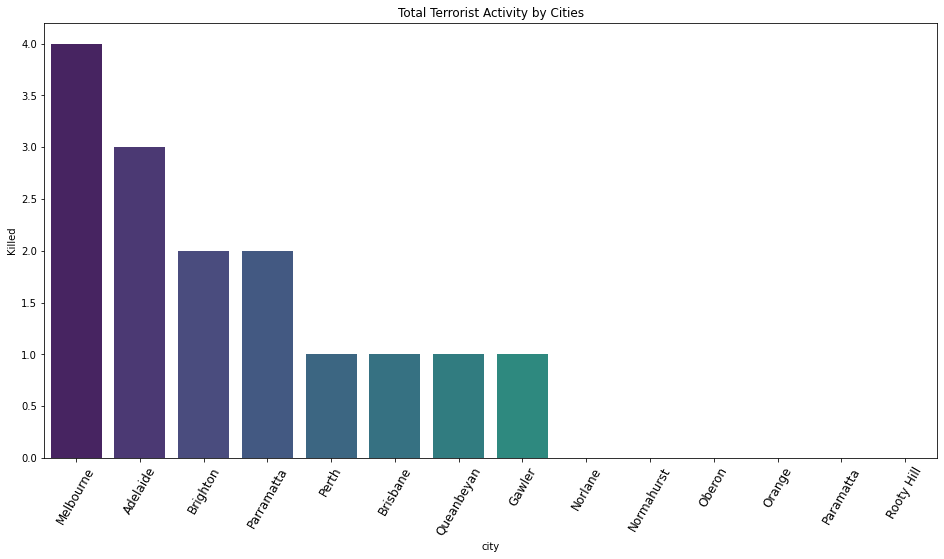

In [33]:
most_citites=df_au.groupby("city")["Killed"].sum().to_frame()
most_citites=most_citites.sort_values("Killed",ascending=False)[1:15]
plt.subplots(figsize=(16,8))
sns.barplot(most_citites.index,most_citites.Killed,palette="viridis")
plt.title("Total Terrorist Activity by Cities")
plt.xticks(rotation=60)
plt.xticks(fontsize=12)
plt.show()

The two biggest cities (Sydney & Melbourne) are most vulnerable. Sydney is considerably a hotspot for terrorism activieies, with nearly triple the number of cases in Melbourne.

Text(0.5, 1.0, 'Number of Terrorist Activities Each Year in Sydney')

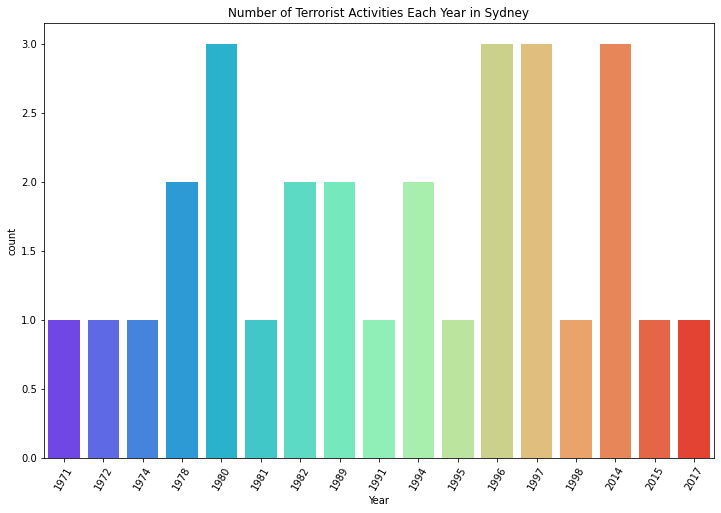

In [36]:
diyarbakır_data = df_au[df_au["city"]=="Sydney"]

plt.subplots(figsize=(12,8))
sns.countplot("Year",data=diyarbakır_data,palette="rainbow")
plt.xticks(rotation=60)
plt.title("Number of Terrorist Activities Each Year in Sydney")

# **# WHERE ARE THE MOST POPULAR ATTACK TYPES OF TERRORISM IN AUSTRALIA?**

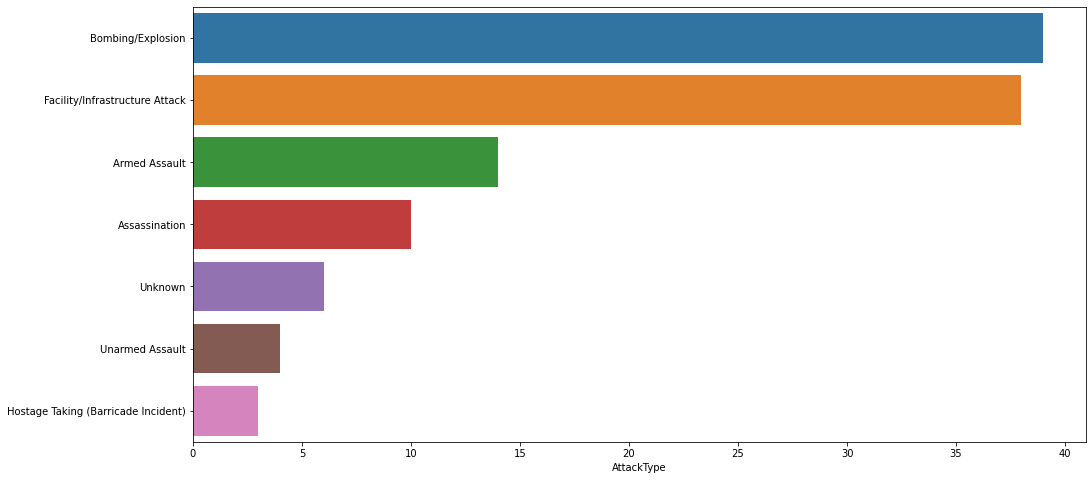

In [28]:
plt.subplots(figsize=(16,8))
sns.barplot(x=df_au.AttackType.value_counts(), y=df_au.AttackType.value_counts().index,
            order = df_au.AttackType.value_counts().iloc[:25].index, orient="h")

When travelling to Australia, be careful for bombing/explosion and infrastructure attack.
This is in line with the most popular form of attack worldwide

# **WEAPONS USED IN THE ATTACK**

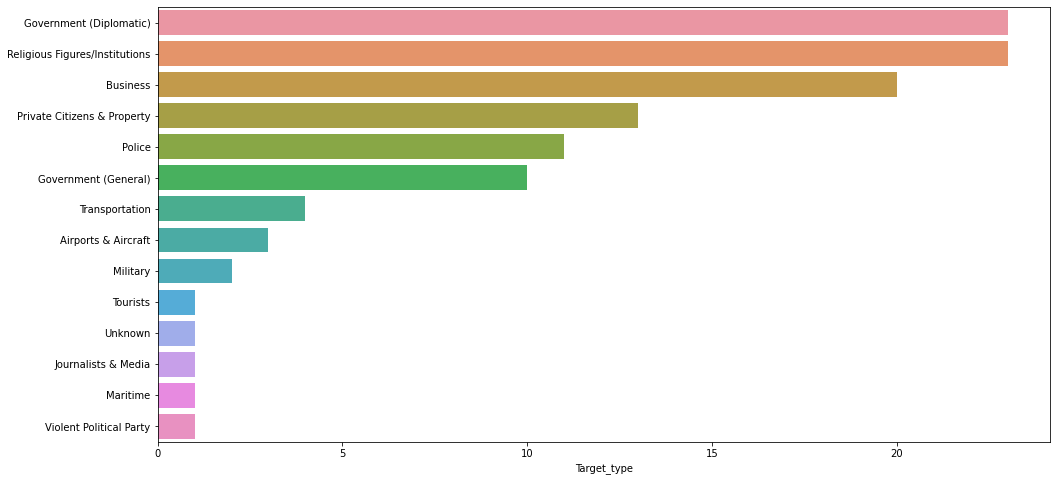

In [29]:
plt.subplots(figsize=(16,8))
sns.barplot(x=df_au.Target_type.value_counts(), y=df_au.Target_type.value_counts().index,
            order = df_au.Target_type.value_counts().iloc[:25].index, orient="h")

# **TARGET TYPES**

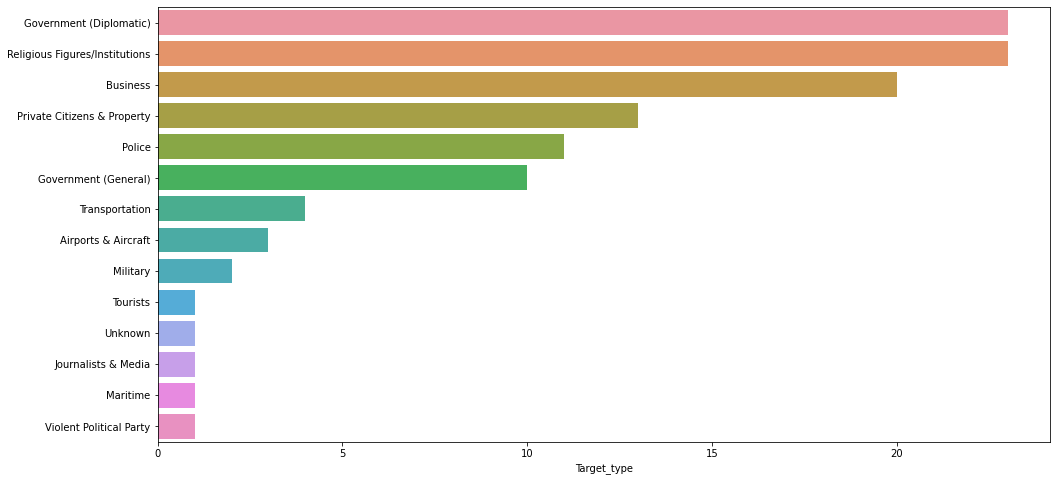

In [31]:
plt.subplots(figsize=(16,8))
sns.barplot(x=df_au.Target_type.value_counts(), y=df_au.Target_type.value_counts().index,
            order = df_au.Target_type.value_counts().iloc[:25].index, orient="h")

# **WHICH GROUPS CONDUCT THE TERRORIST ACTIVITIES?**

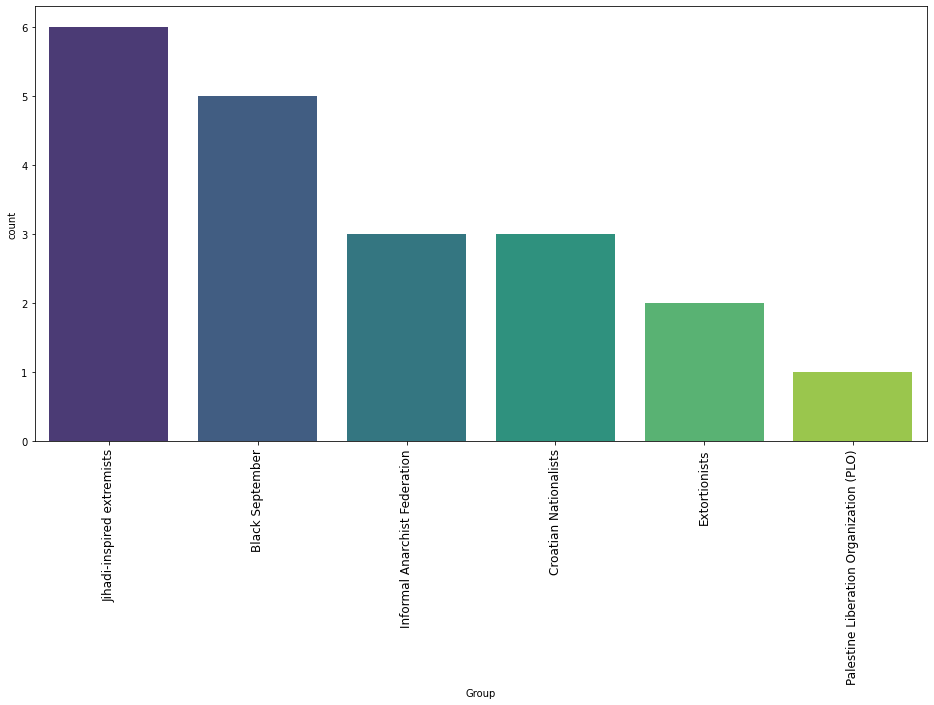

In [37]:
groups = df_au["Group"].value_counts().drop("Unknown").index[:6]
groups = df_au[df_au["Group"].isin(groups)]
plt.subplots(figsize=(16,8))
sns.countplot("Group",data=groups,order=groups.Group.value_counts().index,palette="viridis")
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()